# Notebook to contain and create plots

#### Plots to create


* Runtime comparison between pure Python, compiled python with numba, and numba compiled Pyomp parallelized python.
* One high resolution mandelbrot set plot to show in poster.
* Maybe Speedup plot. 


### Reading files into dataset and importing the libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast  # To safely convert string representation of dictionary
import os

print(os.getcwd())


df = pd.read_csv("../data/bigdata.csv")



/Users/chekho0000/project/bit/code


### Threads vs Runtime plot


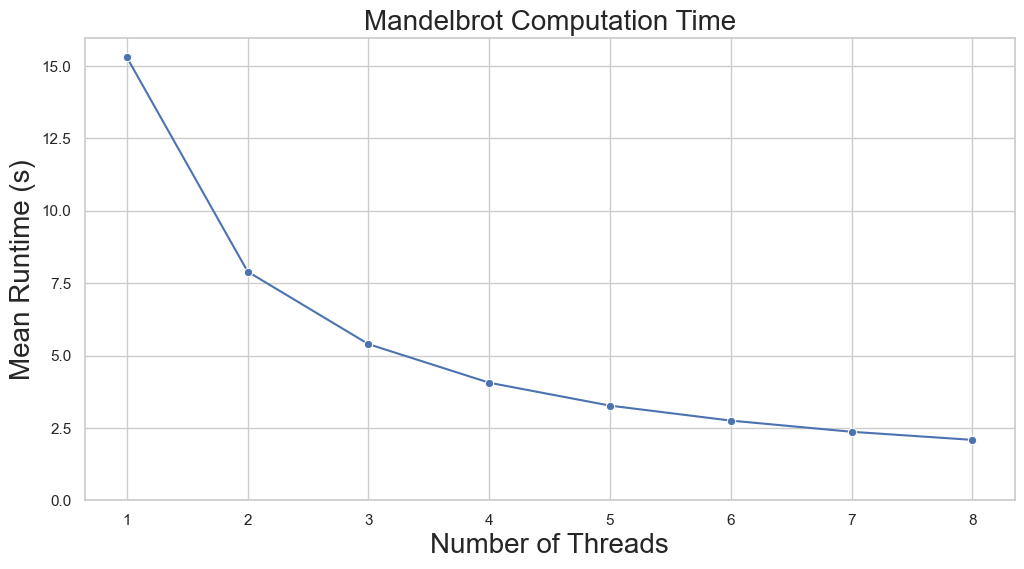

In [3]:


# Load CSV file
df = pd.read_csv("../data/bigdata.csv")

# Filter data for the highest parameter combinations and only "withomp" application
df_filtered = df[
    (df["num_points"] == 5000) & 
    (df["max_iterations"] == 1000) & 
    (df["application"] == "withomp") &
    (df['chunk_size'] == '1')
]

# Aggregate data: Compute mean and standard deviation per setting
df_agg = df_filtered.groupby(["num_threads"])["runtime"].agg(["mean", "std"]).reset_index()

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Create a line plot with error bars
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_agg, 
    x="num_threads", 
    y="mean", 
    marker="o", 
    err_style="bars", 
)

# Labels and title
plt.xlabel("Number of Threads", fontsize=20)
plt.ylabel("Mean Runtime (s)", fontsize=20)
plt.title("Mandelbrot Computation Time", fontsize=20)


plt.ylim(0, None)
sns.set_context("poster") 

# plt.savefig('../plots/mandelbrot_computation_time_omp_default_chunks.pdf')

# Show the plot
plt.show()


### Work distribution plot

/var/folders/2z/xpc75hl955z51cbxq8bn9zq40000gr/T/ipykernel_2501/1375658141.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(work_array)), y=work_array, palette="viridis")


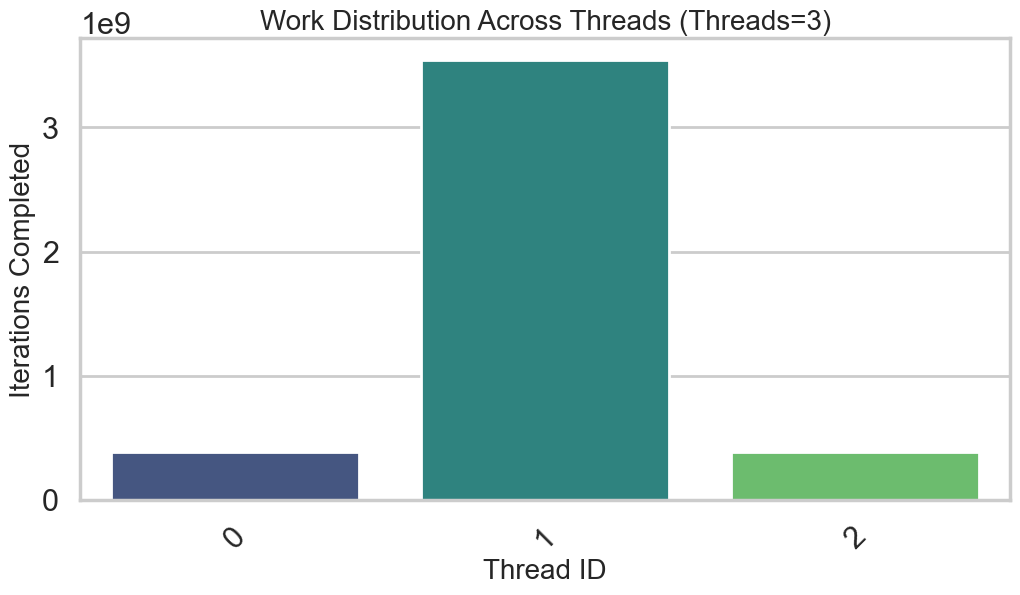

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Load CSV file
df = pd.read_csv("../data/bigdata.csv")

# Filter for highest num_threads
df_filtered = df[(df["num_threads"] == 3) & (df['max_iterations'] == 1000) & (df['num_points'] == 5000)]

# Extract one example of the 'work' array (assuming it's stored as a string)
work_array_str = df_filtered.iloc[0]["work"]  # Take first entry

# Clean up the string (remove extra spaces and brackets)
work_array_str = re.sub(r"\s+", " ", work_array_str.strip("[]"))  # Remove extra spaces
work_array = np.array([int(x) for x in work_array_str.split()])  # Convert to NumPy array

# Create a bar plot to show work distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=np.arange(len(work_array)), y=work_array, palette="viridis")

# Labels and title
plt.xlabel("Thread ID", fontsize=20) 
plt.ylabel("Iterations Completed", fontsize=20)
plt.title(f"Work Distribution Across Threads (Threads=3)", fontsize=20)
plt.xticks(rotation=45)

sns.set_context("poster") 
# Show the plot
plt.savefig('../plots/plots_to_upload/work_distro_3threads.pdf')
plt.show()


### Work distrubution super plot

/var/folders/2z/xpc75hl955z51cbxq8bn9zq40000gr/T/ipykernel_1450/1802812687.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[idx], data=work_df, x="Thread ID", y="Iterations", palette="viridis")
/var/folders/2z/xpc75hl955z51cbxq8bn9zq40000gr/T/ipykernel_1450/1802812687.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[idx], data=work_df, x="Thread ID", y="Iterations", palette="viridis")
/var/folders/2z/xpc75hl955z51cbxq8bn9zq40000gr/T/ipykernel_1450/1802812687.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes

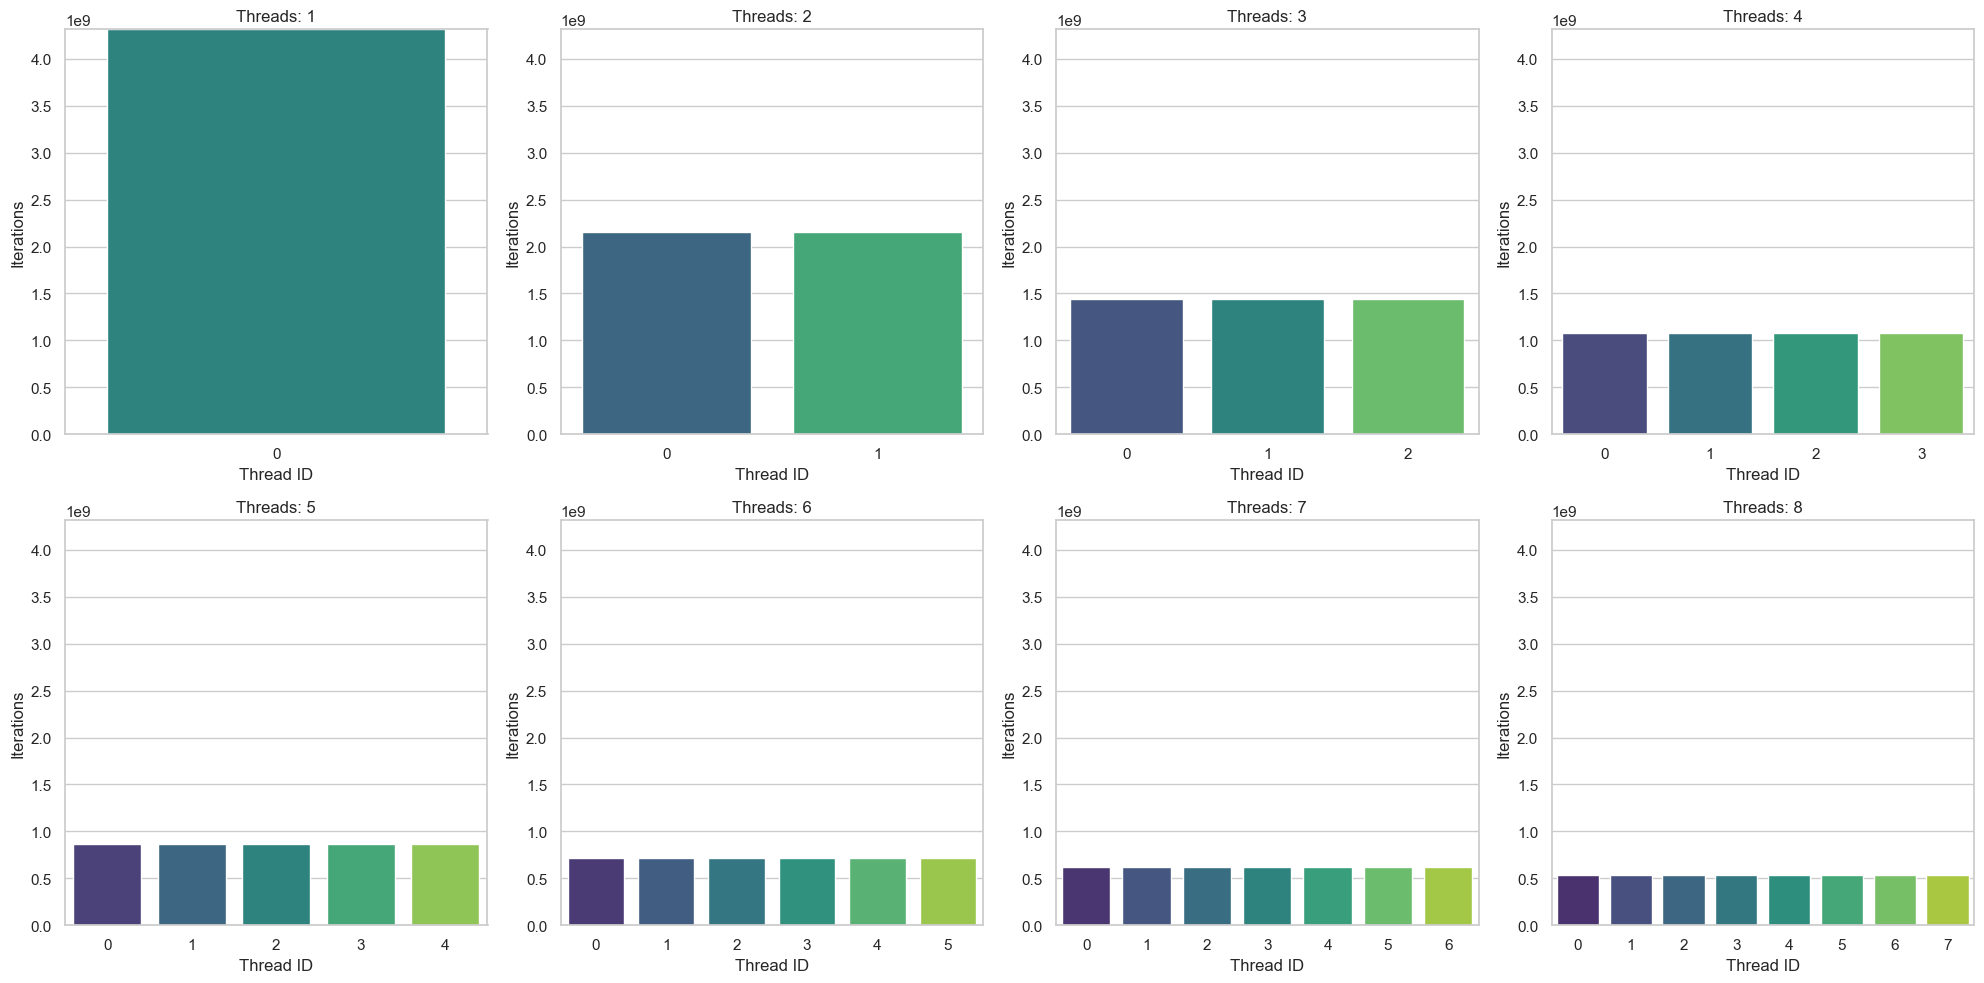

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

# Load CSV file
df = pd.read_csv("../data/bigdata.csv")

# Find the highest num_points and max_iterations
chunk_size = "1"
max_num_points = df["num_points"].max()
max_iterations = df["max_iterations"].max()

# Filter for the highest num_points and max_iterations, and chunk_size = default
df_filtered = df[(df["num_points"] == max_num_points) & 
                 (df["max_iterations"] == max_iterations) & 
                 (df["chunk_size"] == chunk_size)]

# Get sorted unique thread counts after filtering
unique_threads = sorted(df_filtered["num_threads"].unique())

# Divide unique thread counts into 8 groups
thread_groups = np.array_split(unique_threads, 8)

# Select the row with the highest num_threads from each group
selected_rows = []
all_work_arrays = []  # Store work arrays to determine max value

for group in thread_groups:
    if len(group) > 0:
        max_threads = max(group)  # Get the highest num_threads in this group
        row = df_filtered[df_filtered["num_threads"] == max_threads].iloc[0]  # Take first matching row
        selected_rows.append(row)

        # Extract and clean the 'work' array
        work_array_str = row["work"]
        work_array_str = re.sub(r"\s+", " ", work_array_str.strip("[]"))  # Remove extra spaces
        work_array = np.array([int(x) for x in work_array_str.split()])  # Convert to NumPy array
        all_work_arrays.append(work_array)

# Determine the global max for y-axis scaling
max_iterations_per_thread = max(map(max, all_work_arrays))

# Create a grid of bar plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns
axes = axes.flatten()  # Flatten for easy iteration

# Plot each selected row
for idx, (row, work_array) in enumerate(zip(selected_rows, all_work_arrays)):
    work_df = pd.DataFrame({"Thread ID": np.arange(len(work_array)), "Iterations": work_array})

    # Plot
    sns.barplot(ax=axes[idx], data=work_df, x="Thread ID", y="Iterations", palette="viridis")
    axes[idx].set_title(f"Threads: {row['num_threads']}")
    axes[idx].set_xlabel("Thread ID")
    axes[idx].set_ylabel("Iterations")
    axes[idx].set_ylim(0, max_iterations_per_thread)  # Set consistent y-axis scale

# Hide any unused subplots
for i in range(len(selected_rows), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.savefig('../plots/work_distribution_chunk_one.pdf')
plt.show()


### Scale difference plot

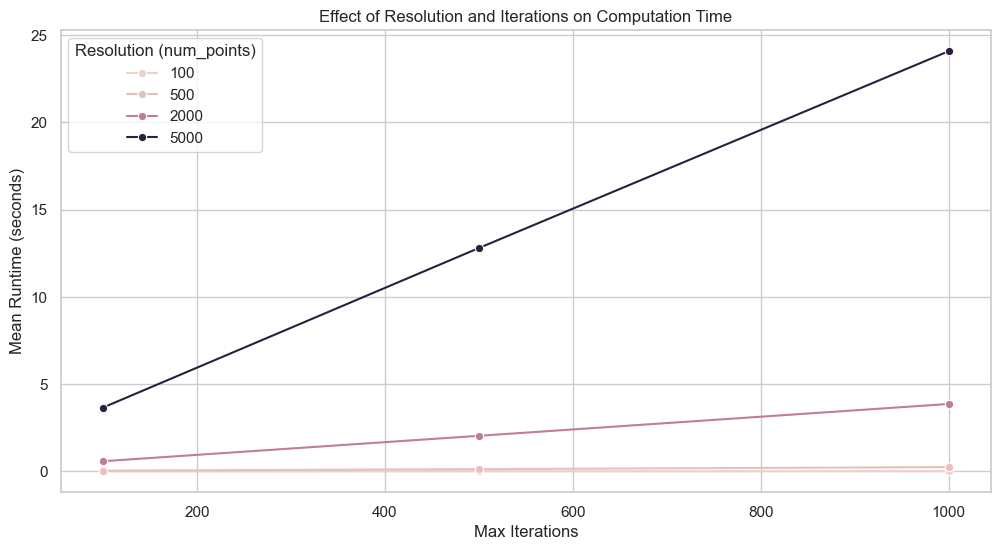

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv("../data/bigdata.csv")

# Group by num_points and max_iterations, averaging runtime (with std deviation for error bars)
df_agg = df.groupby(["num_points", "max_iterations"])["runtime"].agg(["mean", "std"]).reset_index()

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Create a line plot with error bars
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_agg, 
    x="max_iterations", 
    y="mean", 
    hue="num_points",  # Different lines for each resolution
    marker="o", 
    err_style="bars"
)

# Labels and title
plt.xlabel("Max Iterations")
plt.ylabel("Mean Runtime (seconds)")
plt.title("Effect of Resolution and Iterations on Computation Time")
plt.legend(title="Resolution (num_points)")

# Show the plot
plt.savefig('../plots/scaleplot.pdf')
plt.show()


### Exctracting and calculating speedup

In [50]:
import pandas as pd

# Load CSV file
df = pd.read_csv("../data/bigdata.csv")

# Filter for required num_points and max_iterations
df_filtered = df[(df["num_points"] == 5000) & (df["max_iterations"] == 1000)]

# Define the order of applications we are comparing
implementations = ["python", "withnumba", "withomp", "withomp_chunksize_1"]

# Extract runtime for each implementation
runtime_dict = {}

for impl in implementations:
    # Get the runtime for this implementation
    if impl == 'withomp':
        runtime = df_filtered[(df_filtered["application"] == 'withomp') & (df_filtered["chunk_size"] == 'default') & ((df_filtered["num_threads"] == 8))]["runtime"].mean()
    elif impl == 'withomp_chunksize_1':
        runtime = df_filtered[(df_filtered["application"] == 'withomp') & (df_filtered["chunk_size"] == '1') & ((df_filtered["num_threads"] == 8))]["runtime"].mean()
    else:
        runtime = df_filtered[df_filtered["application"] == impl]["runtime"].mean()
    runtime_dict[impl] = runtime

# Get baseline runtime (Python)
baseline_runtime = runtime_dict["python"]

# Calculate speedups
speedup_results = []
prev_runtime = None

for impl in implementations:

    runtime = runtime_dict[impl]
    
    # Absolute speedup (compared to Python)
    absolute_speedup = float(baseline_runtime / runtime)
    
    # Relative speedup (compared to previous implementation)
    if prev_runtime is not None:
        relative_speedup = float(prev_runtime / runtime)
    else:
        relative_speedup = 1  # No relative speedup for first application
    
    # Store results
    speedup_results.append({
        "application": impl,
        "runtime": runtime,
        "absolute_speedup": absolute_speedup,
        "relative_speedup": relative_speedup
    })
    
    # Update previous runtime
    prev_runtime = runtime

# Convert results to DataFrame
df_speedup = pd.DataFrame(speedup_results)

# Display results
print(df_speedup)


           application     runtime  absolute_speedup  relative_speedup
0               python  304.577165          1.000000          1.000000
1            withnumba   14.859440         20.497218         20.497218
2              withomp    5.375733         56.657792          2.764170
3  withomp_chunksize_1    2.085561        146.040859          2.577595


### Scale plots v2

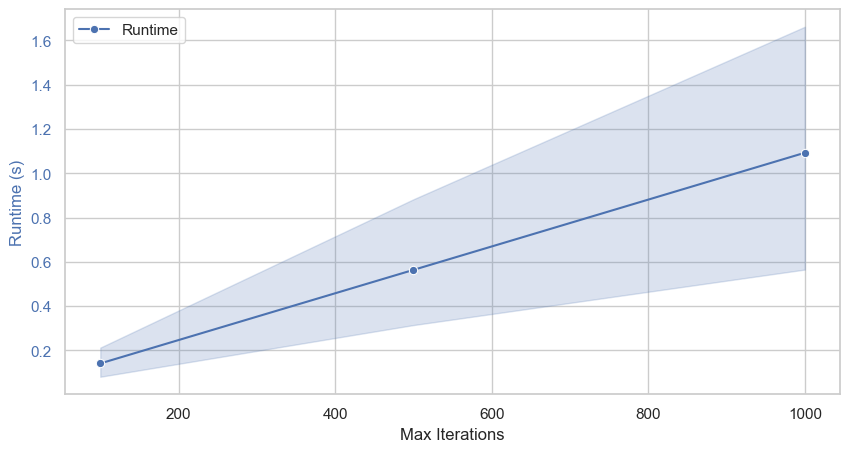

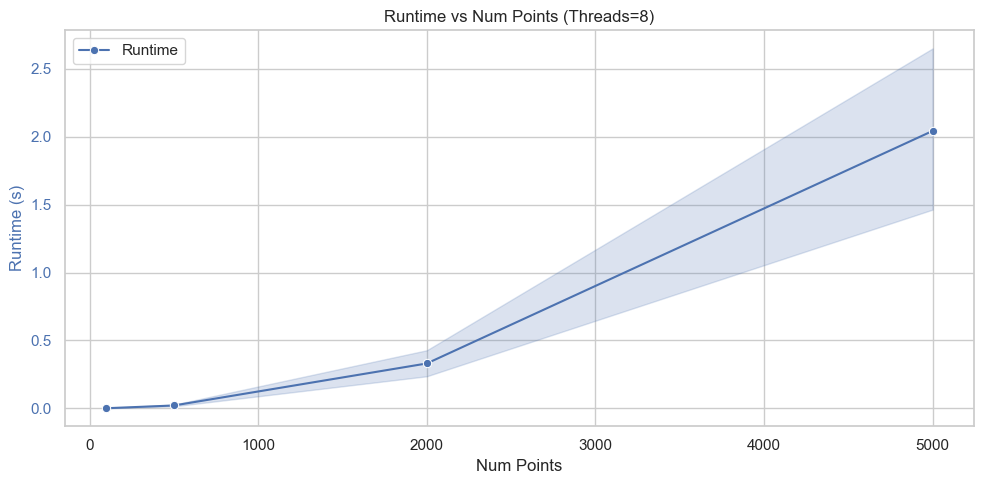

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv("../data/bigdata.csv")

# Filter for a fixed number of threads (e.g., max available)
max_threads = df["num_threads"].max()
df_filtered = df[df["num_threads"] == max_threads]

# First Plot: Relationship between Runtime & max_iterations
fig, ax1 = plt.subplots(figsize=(10, 5))

sns.lineplot(data=df_filtered, x="max_iterations", y="runtime", marker="o", ax=ax1, label="Runtime", color="b")
ax1.set_xlabel("Max Iterations")
ax1.set_ylabel("Runtime (s)", color="b")
ax1.tick_params(axis="y", labelcolor="b")



# Second Plot: Relationship between Runtime & num_points
fig, ax1 = plt.subplots(figsize=(10, 5))

sns.lineplot(data=df_filtered, x="num_points", y="runtime", marker="o", ax=ax1, label="Runtime", color="b")
ax1.set_xlabel("Num Points")
ax1.set_ylabel("Runtime (s)", color="b")
ax1.tick_params(axis="y", labelcolor="b")



plt.title(f"Runtime vs Num Points (Threads={max_threads})")
fig.tight_layout()
plt.show()
